In [119]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [3]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

In [4]:
stats.binom.pmf(6, n=9, p=0.7)

0.2668279319999999

In [5]:
def likelihood(n_water, n_tosses, x):
    return stats.binom.pmf(n_water, n=n_tosses, p=x)


def normalize(array):
    return array / array.sum()

In [89]:
x = np.linspace(0, 1, num=1000)
prior_flat = np.ones_like(x)
prior_step = np.ones_like(x)
prior_step[: prior_step.shape[0] // 2] = 0

[Text(0.5, 1.0, 'binomial with 6 out of 9 tosses as water'),
 Text(0.5, 0, 'probability of water'),
 Text(0, 0.5, 'posterior')]

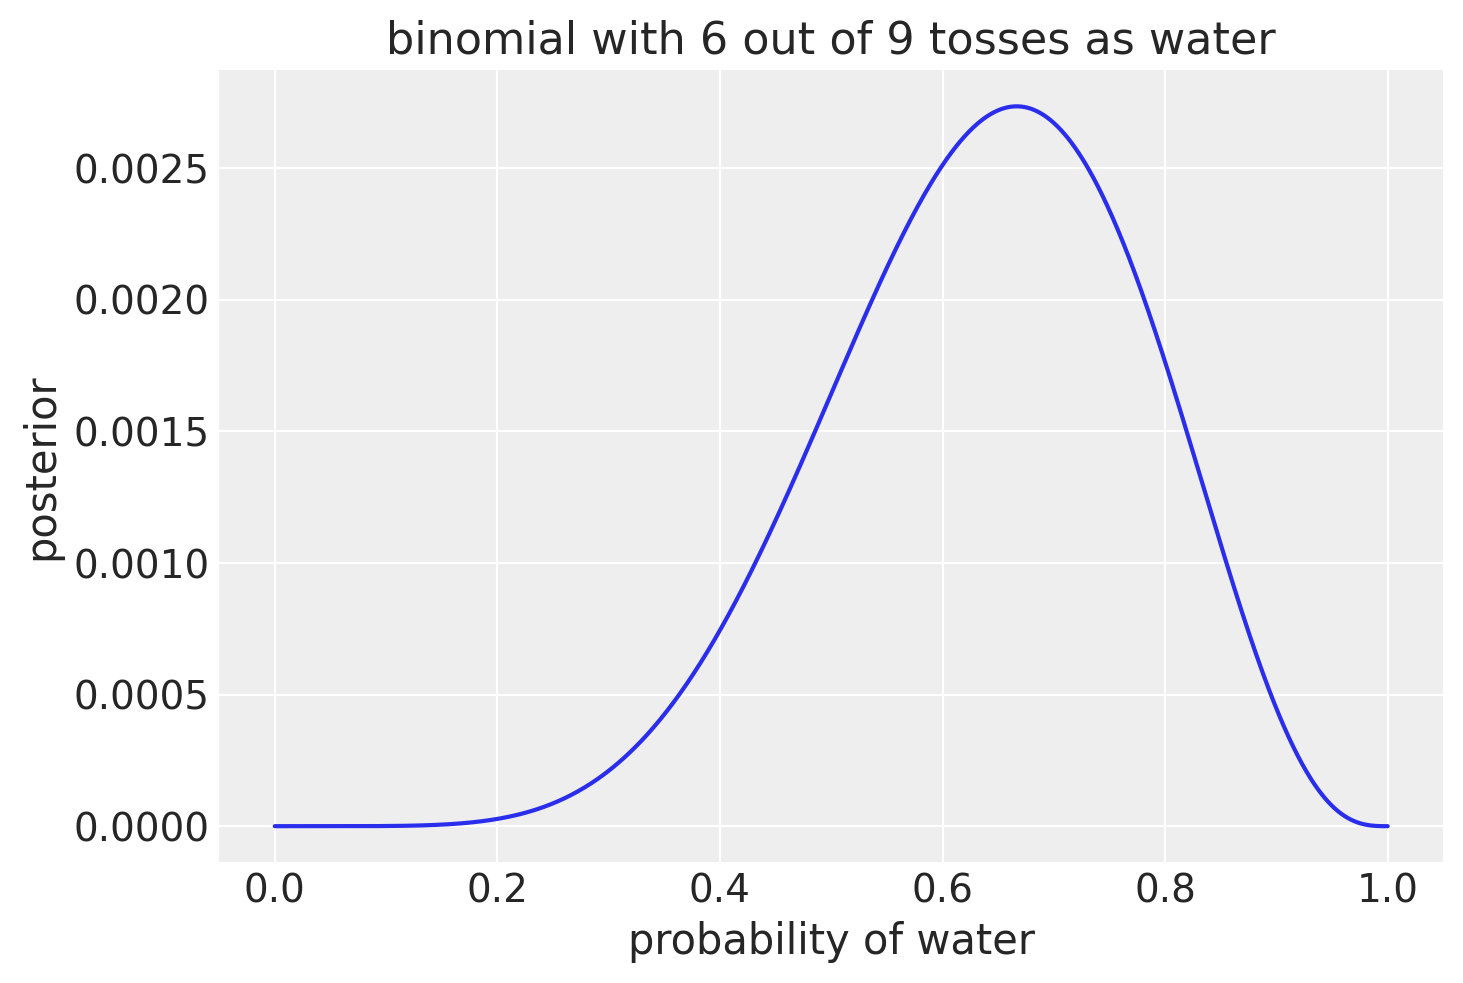

In [90]:
n_water = 6
n_tosses = 9
post_base = normalize(likelihood(n_water, n_tosses, x) * prior_flat)

fig, ax = plt.subplots()
ax.plot(x, normalize(likelihood(n_water, n_tosses, x) * prior_flat))
ax.set(
    title=f"binomial with {n_water} out of {n_tosses} tosses as water",
    xlabel="probability of water",
    ylabel="posterior",
)

# HW 1.1

### Winter 2019

[Text(0.5, 1.0, 'binomial with 8 out of 15 tosses as water'),
 Text(0.5, 0, 'probability of water'),
 Text(0, 0.5, 'posterior')]

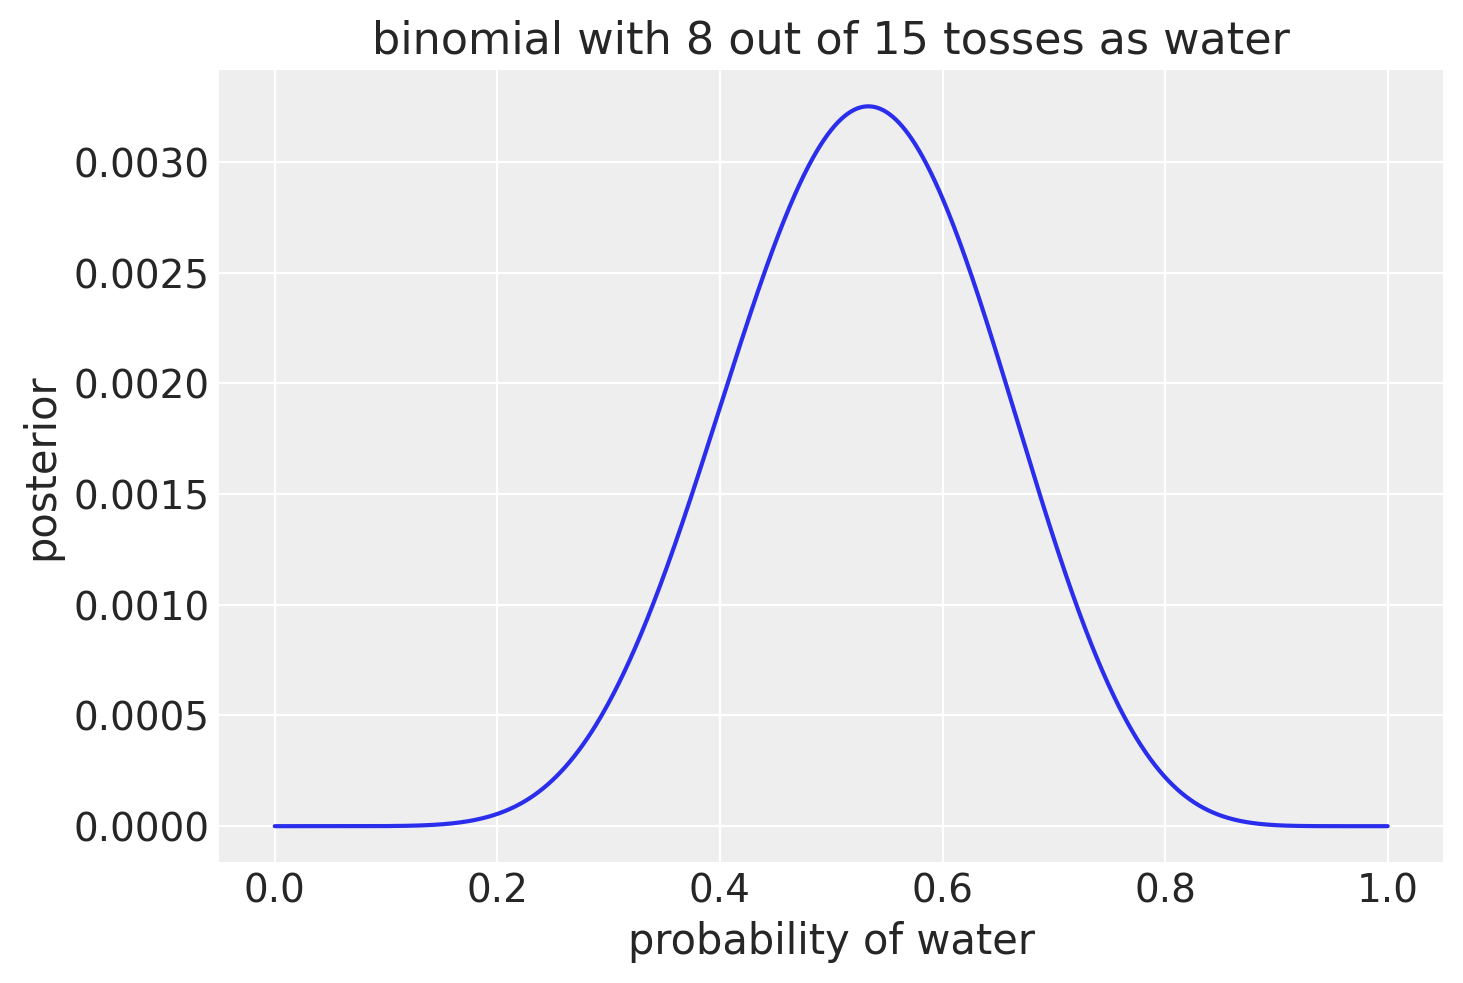

In [91]:
n_water = 8
n_tosses = 15

fig, ax = plt.subplots()
ax.plot(x, normalize(likelihood(n_water, n_tosses, x) * prior_flat))
ax.set(
    title=f"binomial with {n_water} out of {n_tosses} tosses as water",
    xlabel="probability of water",
    ylabel="posterior",
)

### Winter 2020

[Text(0.5, 1.0, 'binomial with 4 out of 15 tosses as water'),
 Text(0.5, 0, 'probability of water'),
 Text(0, 0.5, 'posterior')]

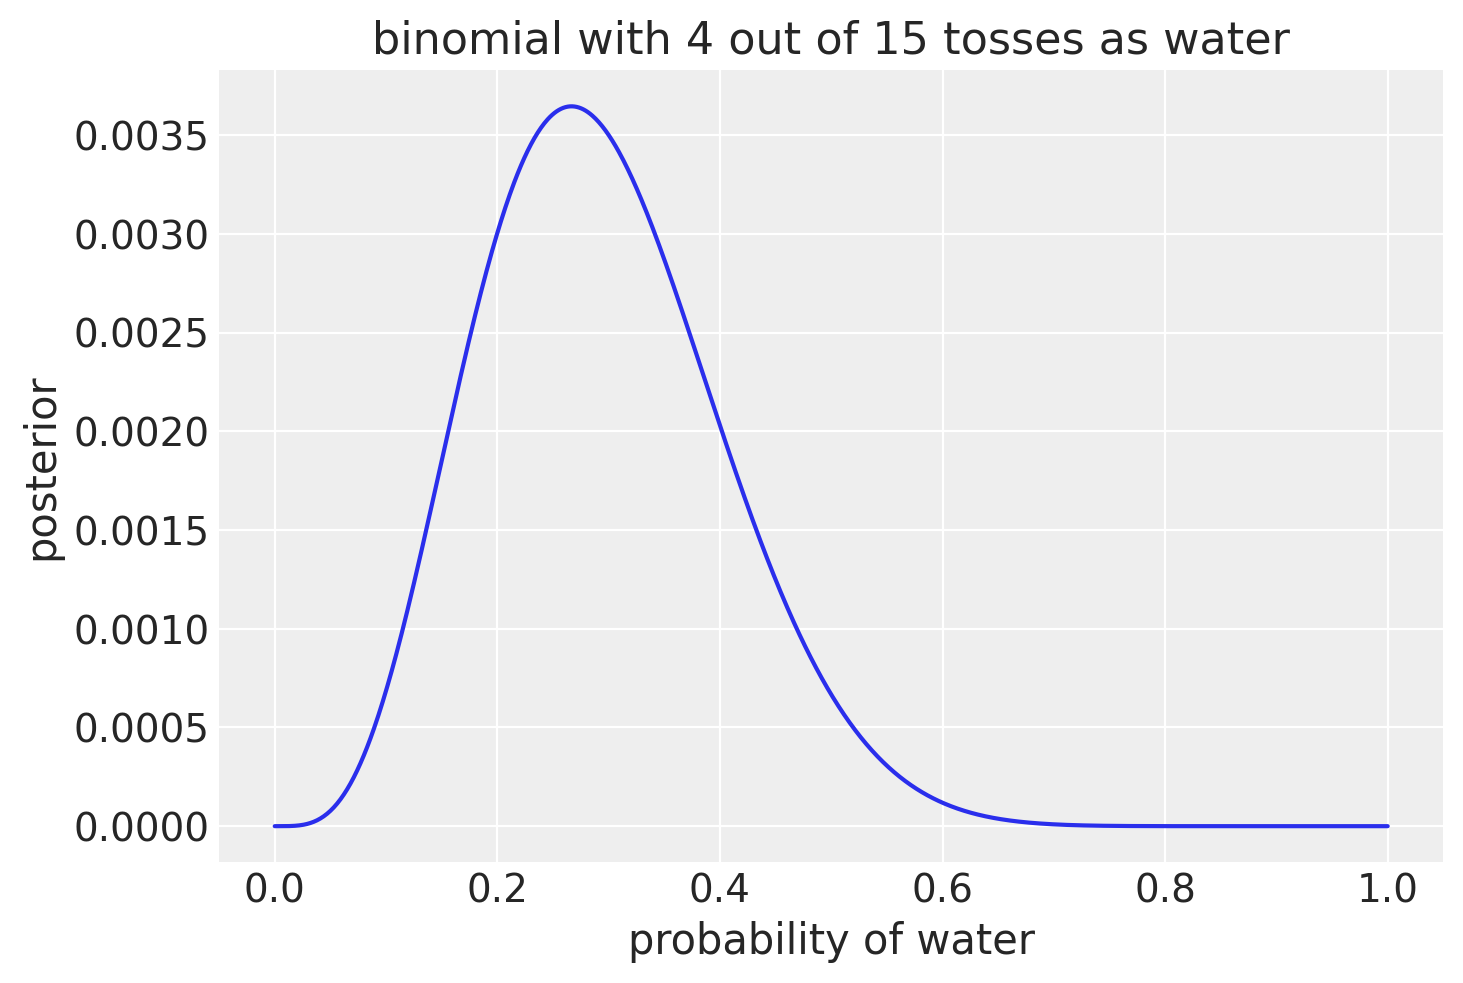

In [92]:
n_water = 4
n_tosses = 15

fig, ax = plt.subplots()
ax.plot(x, normalize(likelihood(n_water, n_tosses, x) * prior_flat))
ax.set(
    title=f"binomial with {n_water} out of {n_tosses} tosses as water",
    xlabel="probability of water",
    ylabel="posterior",
)

# HW 1.2

### Winter 2019

[Text(0.5, 1.0, 'binomial with 8 out of 15 tosses as water'),
 Text(0.5, 0, 'probability of water'),
 Text(0, 0.5, 'posterior')]

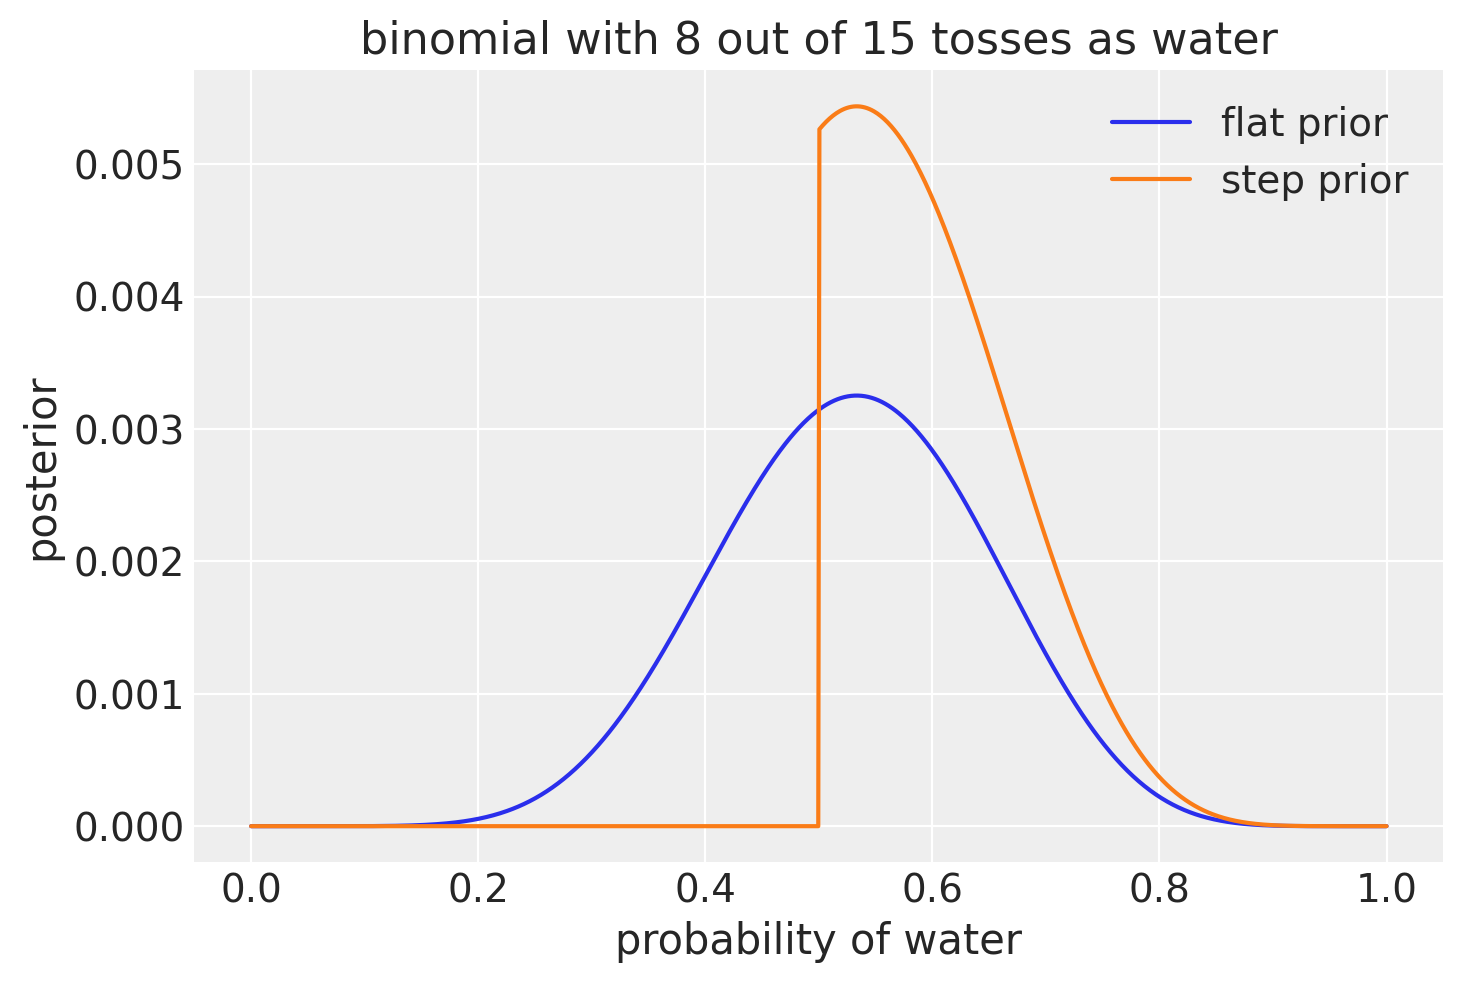

In [93]:
n_water = 8
n_tosses = 15
lh = likelihood(n_water, n_tosses, x)
post_19 = normalize(lh * prior_step)

fig, ax = plt.subplots()
ax.plot(x, normalize(lh * prior_flat), label="flat prior")
ax.plot(x, normalize(lh * prior_step), label="step prior")
ax.legend()
ax.set(
    title=f"binomial with {n_water} out of {n_tosses} tosses as water",
    xlabel="probability of water",
    ylabel="posterior",
)

### Winter 2020

[Text(0.5, 1.0, 'binomial with 4 out of 15 tosses as water'),
 Text(0.5, 0, 'probability of water'),
 Text(0, 0.5, 'posterior')]

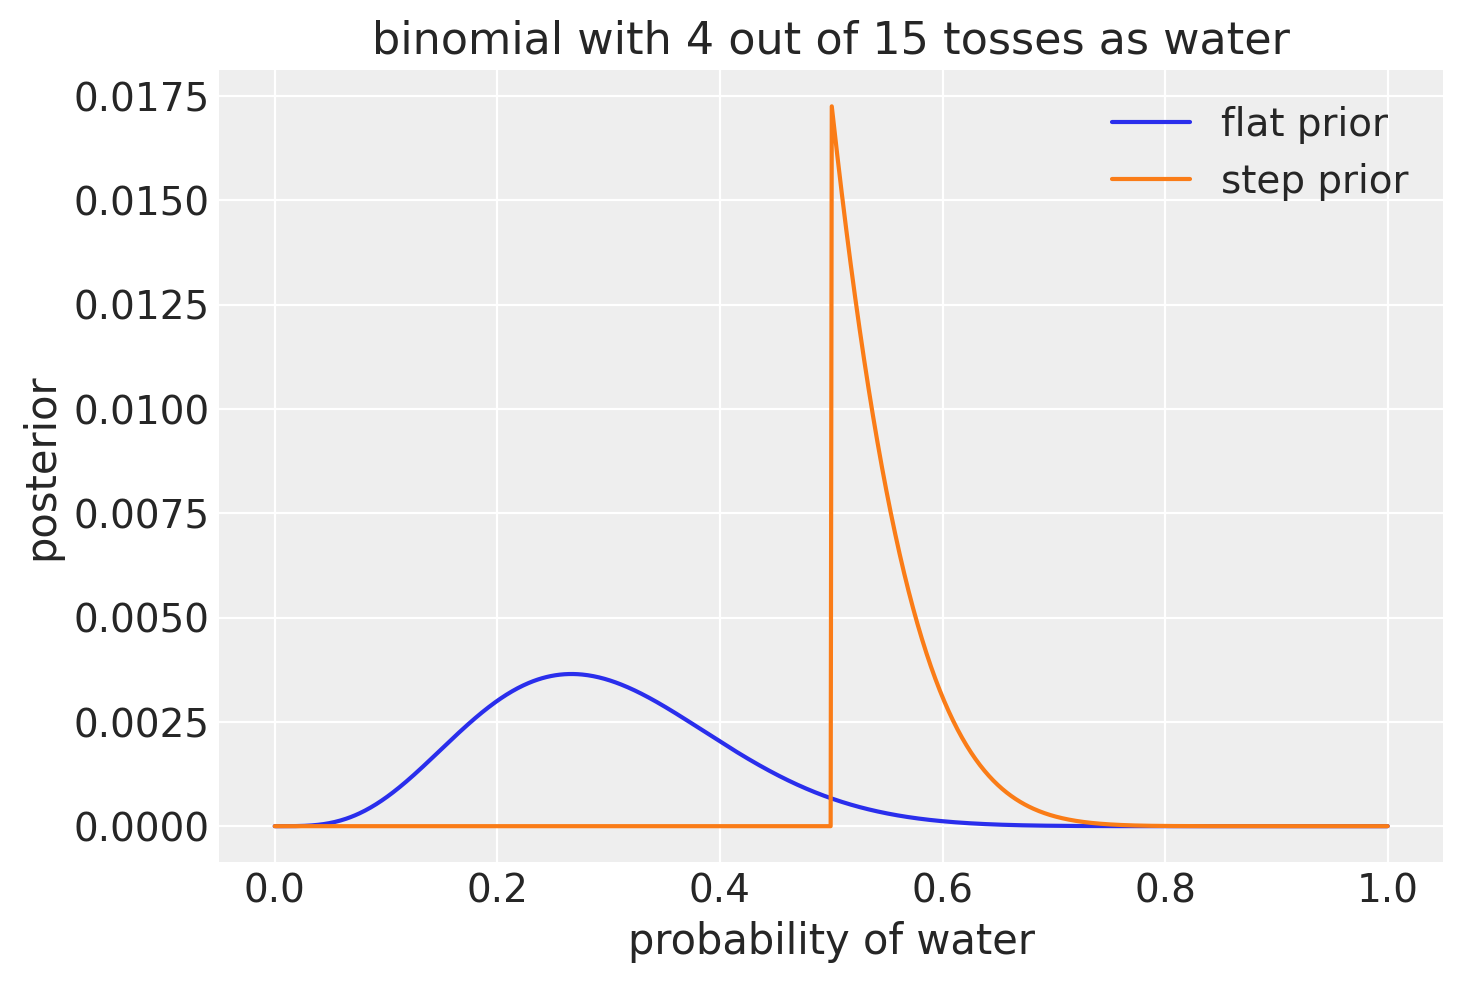

In [94]:
n_water = 4
n_tosses = 15
lh = likelihood(n_water, n_tosses, x)
post_20 = normalize(lh * prior_step)

fig, ax = plt.subplots()
ax.plot(x, normalize(lh * prior_flat), label="flat prior")
ax.plot(x, normalize(lh * prior_step), label="step prior")
ax.legend()
ax.set(
    title=f"binomial with {n_water} out of {n_tosses} tosses as water",
    xlabel="probability of water",
    ylabel="posterior",
)

# HW 1.3

In [95]:
for n in range(3000):
    lower, upper = stats.binom.interval(0.95, n, 0.7)
    width = (upper - lower) / n
    if width < 0.05:
        print(n, width)
        break

1261 0.0499603489294211


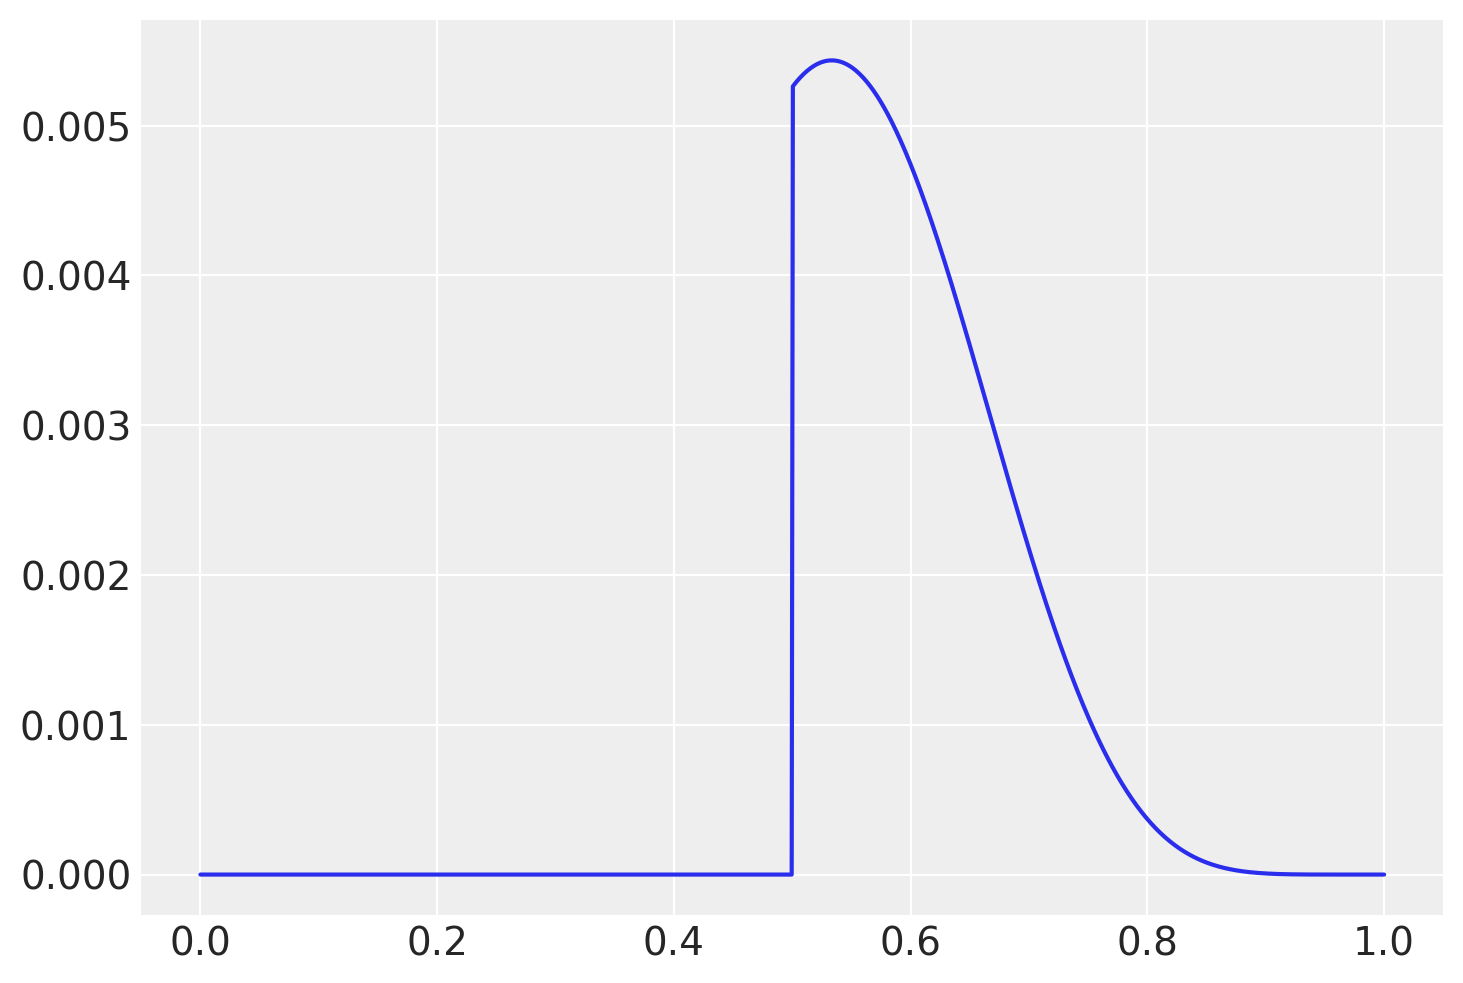

In [96]:
plt.plot(x, post_19)

[Text(0.5, 1.0, 'binomial with 882 out of 1261 tosses as water'),
 Text(0.5, 0, 'probability of water'),
 Text(0, 0.5, 'posterior')]

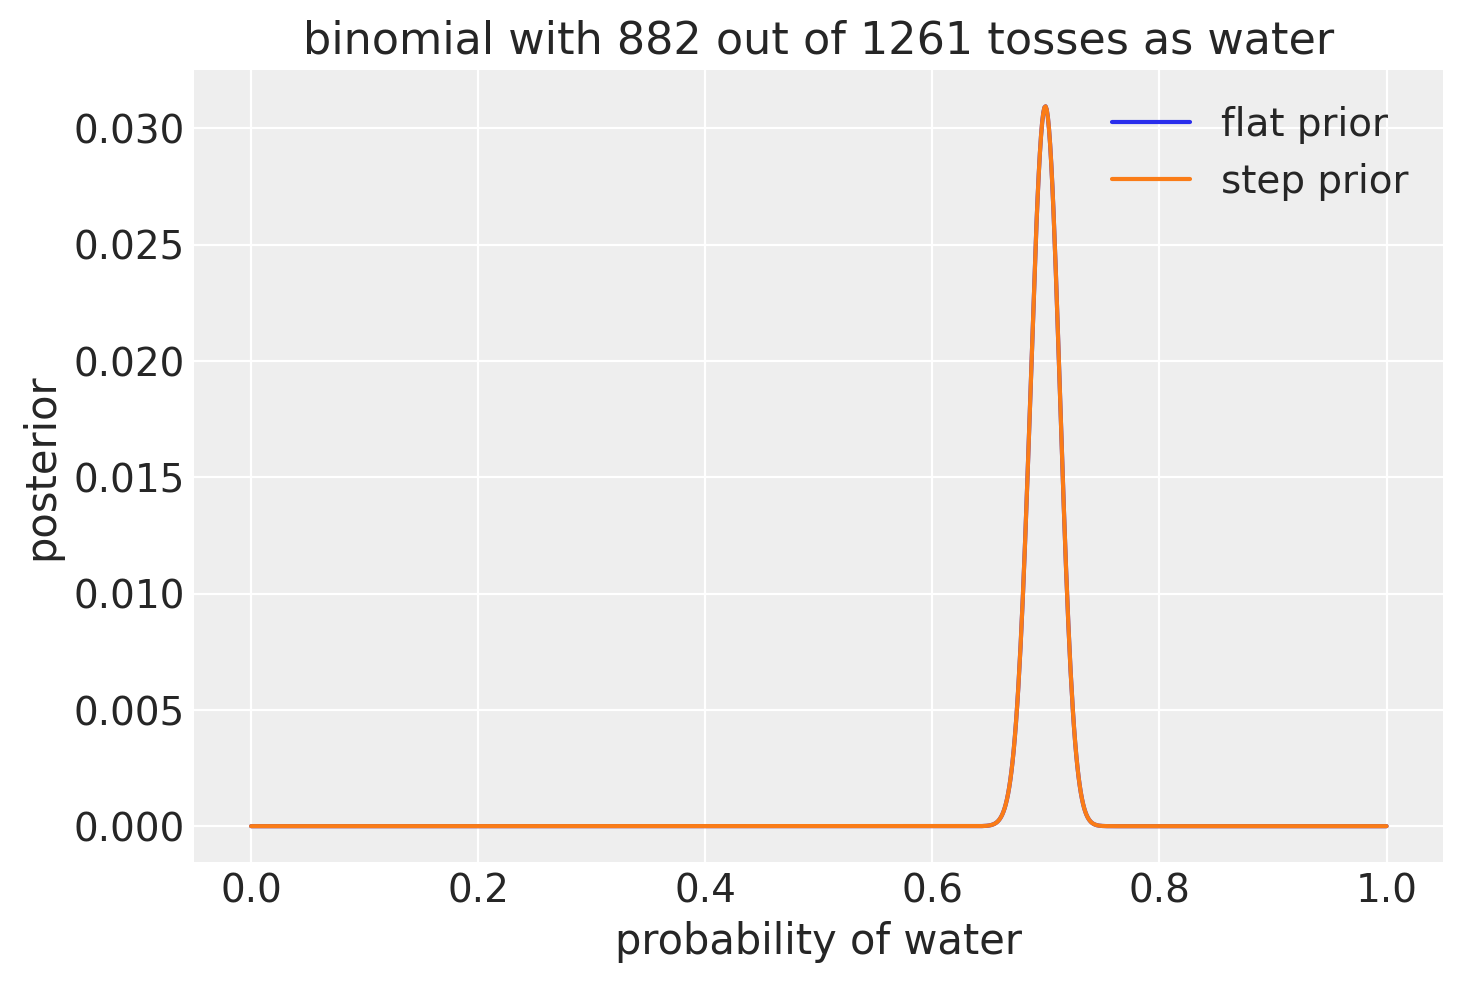

In [118]:
n_water = int(1261 * 0.7)
n_tosses = 1261
lh = likelihood(n_water, n_tosses, x)
post_19 = normalize(lh * prior_step)

fig, ax = plt.subplots()
ax.plot(x, normalize(lh * prior_flat), label="flat prior")
ax.plot(x, normalize(lh * prior_step), label="step prior")
ax.legend()
ax.set(
    title=f"binomial with {n_water} out of {n_tosses} tosses as water",
    xlabel="probability of water",
    ylabel="posterior",
)

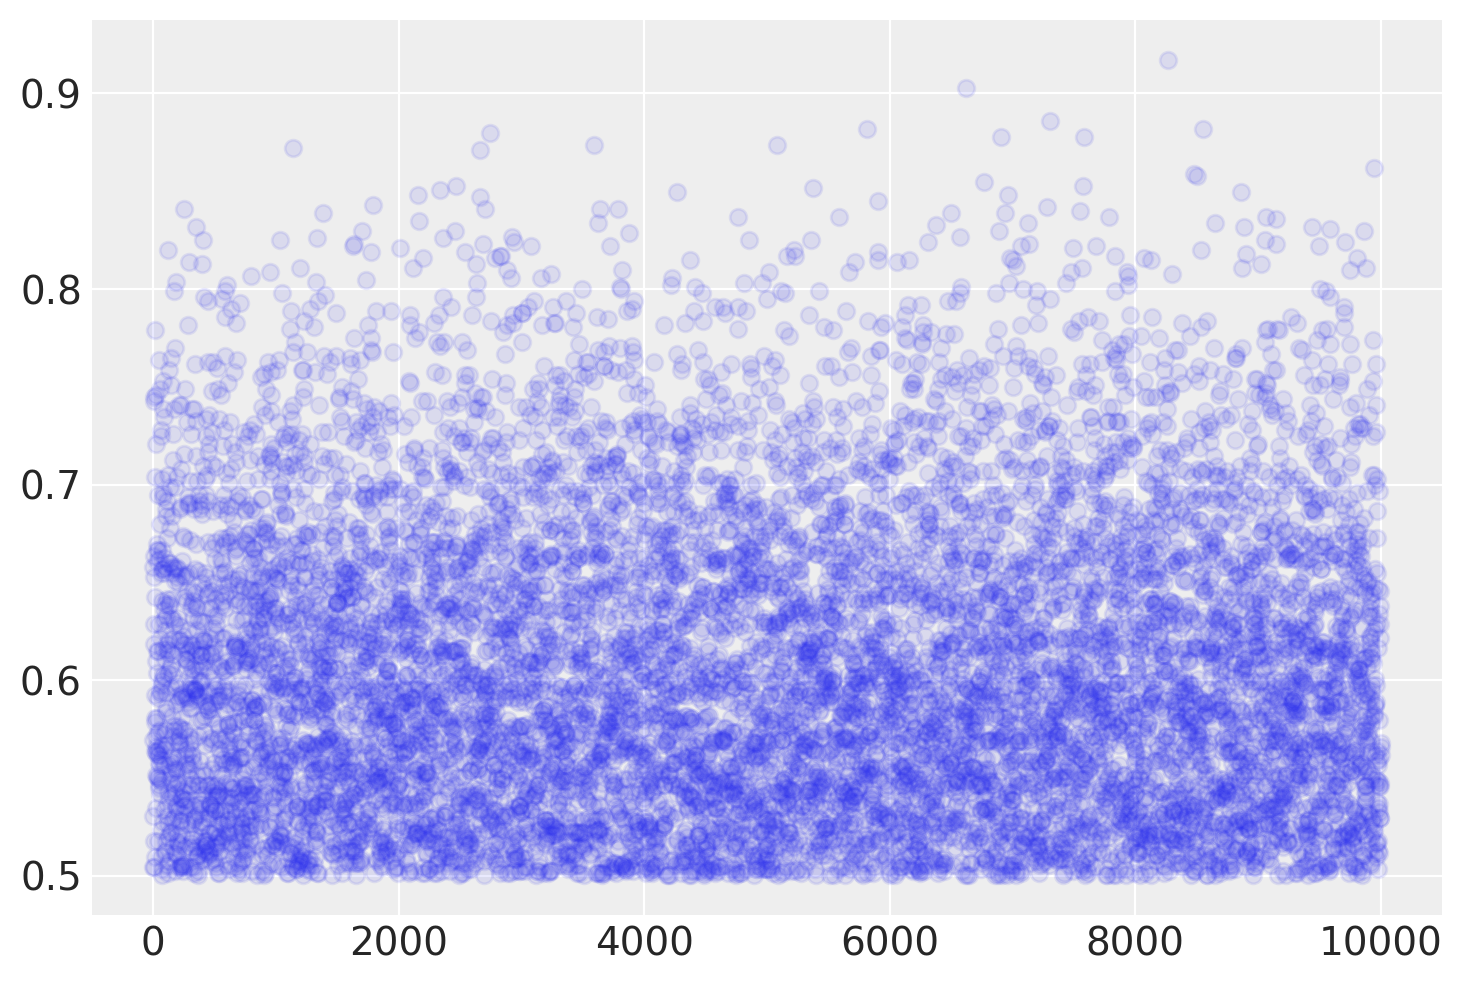

In [97]:
samples = np.random.choice(x, p=post_19, size=int(1e4))
plt.plot(samples, "o", alpha=0.1)

In [98]:
az.hdi(samples, 0.89)

array([0.5005005 , 0.70770771])

In [99]:
np.percentile(samples, 89)

0.7077077077077077

In [105]:
hdi_data = az.hdi(samples, 0.89, input_core_dims=[["draw"]])

<AxesSubplot:title={'center':'x'}>

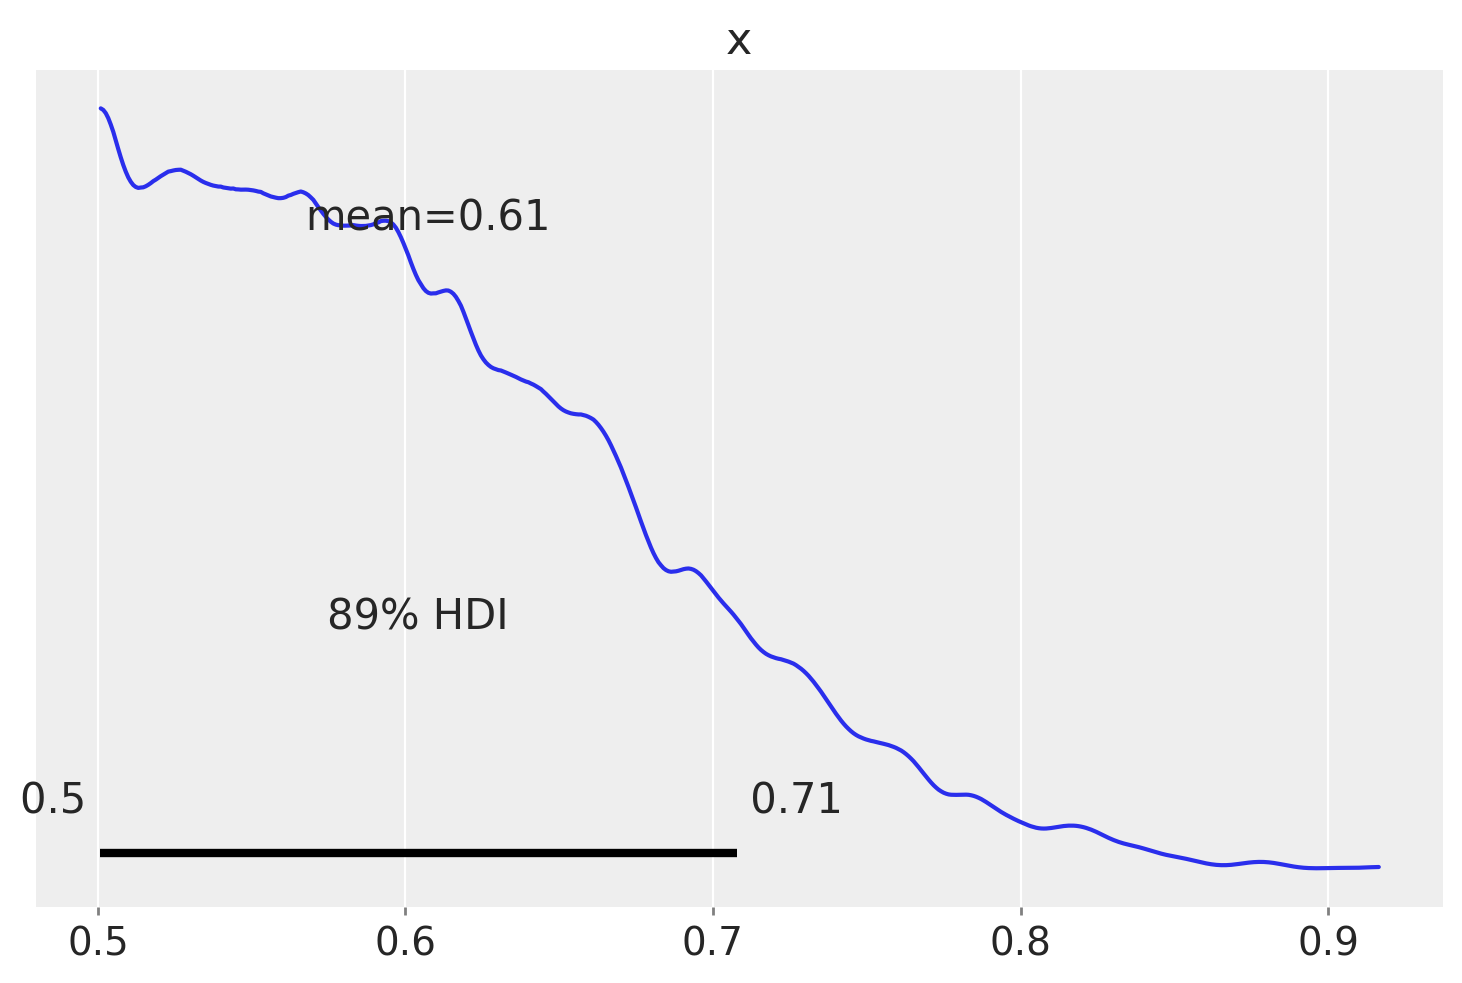

In [108]:
az.plot_posterior(samples, hdi_prob=0.89)